In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

# -------------------------------------------------------
# STEP 1: Create sample dataset
# -------------------------------------------------------
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# -------------------------------------------------------
# STEP 2: Run K-Means 10 times manually
# -------------------------------------------------------
k = 4
num_runs = 10

inertia_values = []      # store SSE of each run
labels_list = []         # store assigned labels for each run
centers_list = []        # store cluster centers of each run

for i in range(num_runs):
    print(f"Running KMeans iteration: {i+1}")

    km = KMeans(
        n_clusters=k,
        init='k-means++',   # smart initialization
        n_init=1,           # VERY IMPORTANT → we are manually repeating
        max_iter=300,
        random_state=None   # different random centers each run
    )

    km.fit(X)

    # Save results of this run
    inertia_values.append(km.inertia_)
    labels_list.append(km.labels_)
    centers_list.append(km.cluster_centers_)

# -------------------------------------------------------
# STEP 3: Pick the best run (minimum SSE)
# -------------------------------------------------------
best_run_index = np.argmin(inertia_values)

print("\n----------------------------------------------")
print("RESULT SUMMARY (10 RUNS):")
print("----------------------------------------------")
for i in range(num_runs):
    print(f"Run {i+1} → Inertia: {inertia_values[i]}")

print("\n----------------------------------------------")
print(f"BEST RUN = {best_run_index+1}")
print(f"BEST INERTIA = {inertia_values[best_run_index]}")
print("----------------------------------------------")

# -------------------------------------------------------
# STEP 4: Best clustering output
# -------------------------------------------------------
best_labels = labels_list[best_run_index]
best_centers = centers_list[best_run_index]

print("\nBest cluster centers:")
print(best_centers)


Running KMeans iteration: 1
Running KMeans iteration: 2
Running KMeans iteration: 3
Running KMeans iteration: 4
Running KMeans iteration: 5
Running KMeans iteration: 6
Running KMeans iteration: 7
Running KMeans iteration: 8
Running KMeans iteration: 9
Running KMeans iteration: 10

----------------------------------------------
RESULT SUMMARY (10 RUNS):
----------------------------------------------
Run 1 → Inertia: 212.00599621083475
Run 2 → Inertia: 212.00599621083475
Run 3 → Inertia: 212.00599621083475
Run 4 → Inertia: 212.00599621083475
Run 5 → Inertia: 212.00599621083475
Run 6 → Inertia: 212.00599621083475
Run 7 → Inertia: 212.00599621083475
Run 8 → Inertia: 212.00599621083475
Run 9 → Inertia: 212.00599621083475
Run 10 → Inertia: 212.00599621083475

----------------------------------------------
BEST RUN = 1
BEST INERTIA = 212.00599621083475
----------------------------------------------

Best cluster centers:
[[-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 1.98258281  0.8

After 1000 experiments:
Average P(A) ≈ 0.500
Average P(B) ≈ 0.400
Average P(A ∩ B) ≈ 0.200


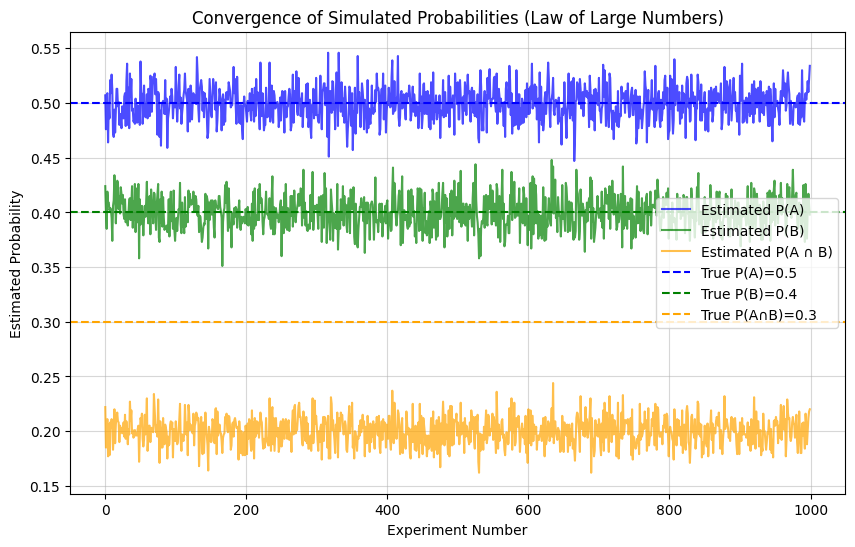

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000         # Number of classes per experiment
experiments = 1000  # Repeat 1000 times

# To store averages of each experiment
A_means = []
B_means = []
AB_means = []

for exp in range(experiments):
    A = []
    B = []
    for i in range(N):
        randA = random.random()
        randB = random.random()

        a = 1 if randA > 0.5 else 0
        b = 1 if randB > 0.6 else 0

        A.append(a)
        B.append(b)

    # Convert to numpy arrays for vector ops
    A = np.array(A)
    B = np.array(B)

    # Calculate average (estimated probability)
    A_mean = np.mean(A)
    B_mean = np.mean(B)
    AB_mean = np.mean(A * B)  # joint probability

    A_means.append(A_mean)
    B_means.append(B_mean)
    AB_means.append(AB_mean)

# Convert lists to arrays for final stats
A_means = np.array(A_means)
B_means = np.array(B_means)
AB_means = np.array(AB_means)

# Print final average results over all 1000 experiments
print("After 1000 experiments:")
print(f"Average P(A) ≈ {A_means.mean():.3f}")
print(f"Average P(B) ≈ {B_means.mean():.3f}")
print(f"Average P(A ∩ B) ≈ {AB_means.mean():.3f}")

# ---------- Visualization ----------
plt.figure(figsize=(10,6))
plt.plot(A_means, label='Estimated P(A)', color='blue', alpha=0.7)
plt.plot(B_means, label='Estimated P(B)', color='green', alpha=0.7)
plt.plot(AB_means, label='Estimated P(A ∩ B)', color='orange', alpha=0.7)
plt.axhline(0.5, color='blue', linestyle='--', label='True P(A)=0.5')
plt.axhline(0.4, color='green', linestyle='--', label='True P(B)=0.4')
plt.axhline(0.3, color='orange', linestyle='--', label='True P(A∩B)=0.3')

plt.xlabel("Experiment Number")
plt.ylabel("Estimated Probability")
plt.title("Convergence of Simulated Probabilities (Law of Large Numbers)")
plt.legend()
plt.grid(alpha=0.5)
plt.show()


After 1000 experiments:
Average P(A) ≈ 0.501
Average P(B) ≈ 0.400
Average P(A ∩ B) ≈ 0.201

Independence Check:
P(A) * P(B) = 0.200
P(A ∩ B)    = 0.201
Difference   = 0.0002


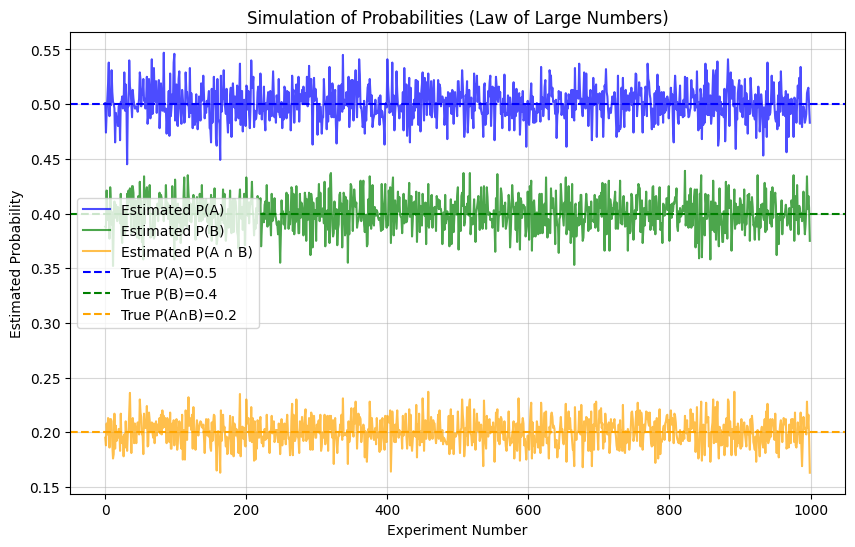

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
N = 1000           # number of classes in one experiment
experiments = 1000 # number of experiments

# Lists to store probability results
A_means = []
B_means = []
AB_means = []

# -----------------------------
# Simulation process
# -----------------------------
for exp in range(experiments):
    A = []
    B = []

    for i in range(N):
        # Generate random numbers between 0 and 1
        randA = random.random()
        randB = random.random()

        # If random number > threshold => attends class
        a = 1 if randA > 0.5 else 0   # P(A) = 0.5
        b = 1 if randB > 0.6 else 0   # P(B) = 0.4

        A.append(a)
        B.append(b)

    # Convert lists to numpy arrays
    A = np.array(A)
    B = np.array(B)

    # Calculate estimated probabilities
    A_mean = np.mean(A)
    B_mean = np.mean(B)
    AB_mean = np.mean(A * B)   # P(A ∩ B)

    # Store in lists
    A_means.append(A_mean)
    B_means.append(B_mean)
    AB_means.append(AB_mean)

# -----------------------------
# Final average results
# -----------------------------
print("After 1000 experiments:")
print(f"Average P(A) ≈ {np.mean(A_means):.3f}")
print(f"Average P(B) ≈ {np.mean(B_means):.3f}")
print(f"Average P(A ∩ B) ≈ {np.mean(AB_means):.3f}")

# Check independence
emp_PA = np.mean(A_means)
emp_PB = np.mean(B_means)
emp_PAB = np.mean(AB_means)

print()
print("Independence Check:")
print(f"P(A) * P(B) = {emp_PA * emp_PB:.3f}")
print(f"P(A ∩ B)    = {emp_PAB:.3f}")
print(f"Difference   = {emp_PAB - (emp_PA * emp_PB):.4f}")

# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(A_means, label='Estimated P(A)', color='blue', alpha=0.7)
plt.plot(B_means, label='Estimated P(B)', color='green', alpha=0.7)
plt.plot(AB_means, label='Estimated P(A ∩ B)', color='orange', alpha=0.7)

# True theoretical probabilities
plt.axhline(0.5, color='blue', linestyle='--', label='True P(A)=0.5')
plt.axhline(0.4, color='green', linestyle='--', label='True P(B)=0.4')
plt.axhline(0.2, color='orange', linestyle='--', label='True P(A∩B)=0.2')

plt.xlabel("Experiment Number")
plt.ylabel("Estimated Probability")
plt.title("Simulation of Probabilities (Law of Large Numbers)")
plt.legend()
plt.grid(alpha=0.5)
plt.show()


After 1000 experiments (each with N=1000 trials):
Theoretical P(A)         = 0.500
Theoretical P(B)         = 0.400
Theoretical P(A ∩ B)     = 0.200
Theoretical P(A ∪ B)     = 0.700

Empirical mean P(A)      = 0.499  (std = 0.0155)
Empirical mean P(B)      = 0.401  (std = 0.0150)
Empirical mean P(A ∩ B)  = 0.200  (std = 0.0123)
Empirical mean P(A ∪ B)  = 0.699  (std = 0.0145)

Independence check:
  Empirical P(A∩B)            = 0.20034
  Empirical P(A)*P(B)         = 0.19987
  Difference (P(A∩B) - P(A)P(B)) = 4.68540e-04
  (A small number near 0 indicates empirical independence within sampling error.)


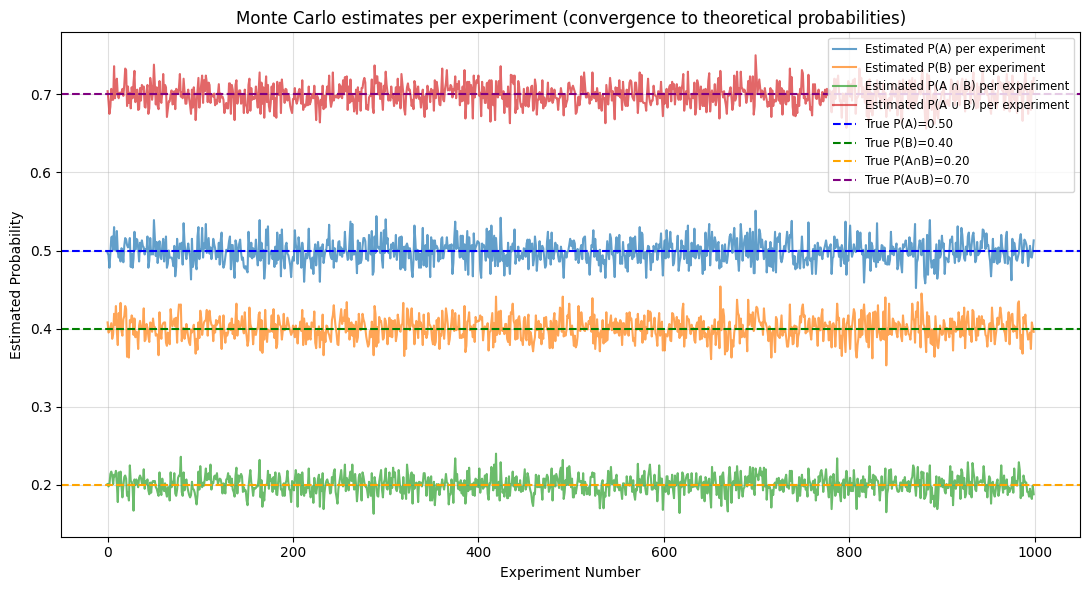

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------- Parameters --------
N = 1000            # number of classes per experiment
experiments = 1000  # number of repeated experiments
seed = 42           # for reproducibility; set to None to disable

# -------- Random generator (recommended) --------
rng = np.random.default_rng(seed)

# -------- Storage for results --------
A_means = np.empty(experiments)
B_means = np.empty(experiments)
AB_means = np.empty(experiments)
AorB_means = np.empty(experiments)  # for P(A ∪ B)

# Theoretical probabilities
P_A_true = 0.5
P_B_true = 0.4
P_AB_true = P_A_true * P_B_true     # 0.2
P_AorB_true = P_A_true + P_B_true - P_AB_true  # P(A) + P(B) - P(A∩B)

# -------- Experiments (vectorized per experiment) --------
for exp in range(experiments):
    # generate N uniform randoms for A and B
    randA = rng.random(N)
    randB = rng.random(N)

    # Bernoulli outcomes
    A = (randA > 0.5).astype(int)   # P(A) ≈ 0.5
    B = (randB > 0.6).astype(int)   # P(B) ≈ 0.4

    # estimates
    A_means[exp] = A.mean()
    B_means[exp] = B.mean()
    AB_means[exp] = (A * B).mean()           # P(A ∩ B)
    AorB_means[exp] = ((A + B) > 0).mean()   # P(A ∪ B)

# -------- Final aggregated results --------
print("After {} experiments (each with N={} trials):".format(experiments, N))
print(f"Theoretical P(A)         = {P_A_true:.3f}")
print(f"Theoretical P(B)         = {P_B_true:.3f}")
print(f"Theoretical P(A ∩ B)     = {P_AB_true:.3f}")
print(f"Theoretical P(A ∪ B)     = {P_AorB_true:.3f}")
print()

print(f"Empirical mean P(A)      = {A_means.mean():.3f}  (std = {A_means.std():.4f})")
print(f"Empirical mean P(B)      = {B_means.mean():.3f}  (std = {B_means.std():.4f})")
print(f"Empirical mean P(A ∩ B)  = {AB_means.mean():.3f}  (std = {AB_means.std():.4f})")
print(f"Empirical mean P(A ∪ B)  = {AorB_means.mean():.3f}  (std = {AorB_means.std():.4f})")
print()

# Check independence: difference between empirical P(A∩B) and product of marginals
emp_PAB = AB_means.mean()
emp_PA = A_means.mean()
emp_PB = B_means.mean()
independence_diff = emp_PAB - (emp_PA * emp_PB)

print("Independence check:")
print(f"  Empirical P(A∩B)            = {emp_PAB:.5f}")
print(f"  Empirical P(A)*P(B)         = {(emp_PA * emp_PB):.5f}")
print(f"  Difference (P(A∩B) - P(A)P(B)) = {independence_diff:.5e}")
print("  (A small number near 0 indicates empirical independence within sampling error.)")

# -------- Visualization --------
plt.figure(figsize=(11,6))
plt.plot(A_means, label='Estimated P(A) per experiment', alpha=0.7)
plt.plot(B_means, label='Estimated P(B) per experiment', alpha=0.7)
plt.plot(AB_means, label='Estimated P(A ∩ B) per experiment', alpha=0.7)
plt.plot(AorB_means, label='Estimated P(A ∪ B) per experiment', alpha=0.7)

# Correct theoretical horizontal lines
plt.axhline(P_A_true, color='blue', linestyle='--', label=f'True P(A)={P_A_true:.2f}')
plt.axhline(P_B_true, color='green', linestyle='--', label=f'True P(B)={P_B_true:.2f}')
plt.axhline(P_AB_true, color='orange', linestyle='--', label=f'True P(A∩B)={P_AB_true:.2f}')
plt.axhline(P_AorB_true, color='purple', linestyle='--', label=f'True P(A∪B)={P_AorB_true:.2f}')

plt.xlabel("Experiment Number")
plt.ylabel("Estimated Probability")
plt.title("Monte Carlo estimates per experiment (convergence to theoretical probabilities)")
plt.legend(loc='upper right', fontsize='small')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


After 1000 experiments:
Average P(A) ≈ 0.500
Average P(B) ≈ 0.400
Average P(A ∩ B) ≈ 0.200
Average P(A ∪ B) ≈ 0.700

Independence Check:
P(A) * P(B) = 0.200
P(A ∩ B)    = 0.200
Difference   = 0.0001


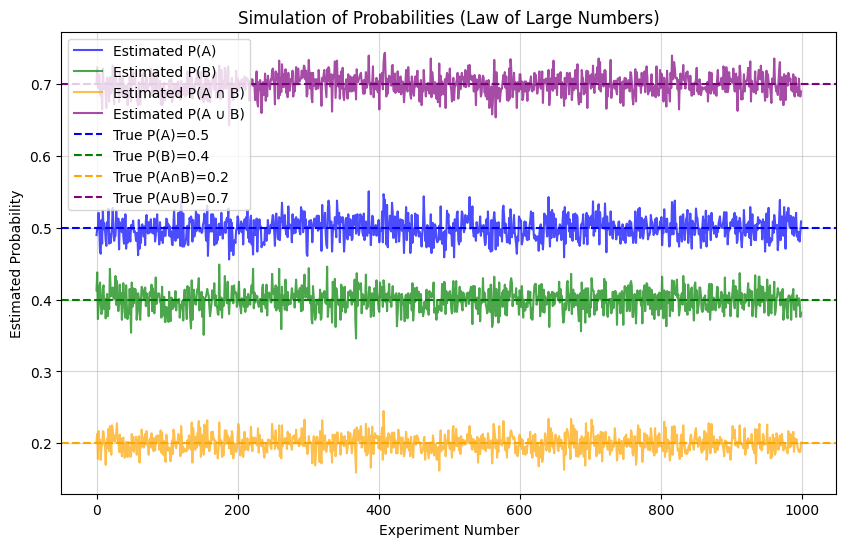

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
N = 1000          # number of classes per experiment
experiments = 1000  # total number of experiments

# Lists to store probability estimates
A_means = []
B_means = []
AB_means = []
AorB_means = []

# -----------------------------
# Simulation process
# -----------------------------
for exp in range(experiments):
    A = []
    B = []

    for i in range(N):
        # Generate random numbers between 0 and 1
        randA = random.random()
        randB = random.random()

        # If random number > threshold => attends class
        a = 1 if randA > 0.5 else 0   # P(A) = 0.5
        b = 1 if randB > 0.6 else 0   # P(B) = 0.4

        A.append(a)
        B.append(b)

    # Convert lists to numpy arrays
    A = np.array(A)
    B = np.array(B)

    # Calculate estimated probabilities
    A_mean = np.mean(A)
    B_mean = np.mean(B)
    AB_mean = np.mean(A * B)           # P(A ∩ B)
    AorB_mean = np.mean((A + B) > 0)   # P(A ∪ B)

    # Store in lists
    A_means.append(A_mean)
    B_means.append(B_mean)
    AB_means.append(AB_mean)
    AorB_means.append(AorB_mean)

# -----------------------------
# Final average results
# -----------------------------
print("After 1000 experiments:")
print(f"Average P(A) ≈ {np.mean(A_means):.3f}")
print(f"Average P(B) ≈ {np.mean(B_means):.3f}")
print(f"Average P(A ∩ B) ≈ {np.mean(AB_means):.3f}")
print(f"Average P(A ∪ B) ≈ {np.mean(AorB_means):.3f}")

# Check independence
emp_PA = np.mean(A_means)
emp_PB = np.mean(B_means)
emp_PAB = np.mean(AB_means)

print()
print("Independence Check:")
print(f"P(A) * P(B) = {emp_PA * emp_PB:.3f}")
print(f"P(A ∩ B)    = {emp_PAB:.3f}")
print(f"Difference   = {emp_PAB - (emp_PA * emp_PB):.4f}")

# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(A_means, label='Estimated P(A)', color='blue', alpha=0.7)
plt.plot(B_means, label='Estimated P(B)', color='green', alpha=0.7)
plt.plot(AB_means, label='Estimated P(A ∩ B)', color='orange', alpha=0.7)
plt.plot(AorB_means, label='Estimated P(A ∪ B)', color='purple', alpha=0.7)

# True theoretical probabilities
plt.axhline(0.5, color='blue', linestyle='--', label='True P(A)=0.5')
plt.axhline(0.4, color='green', linestyle='--', label='True P(B)=0.4')
plt.axhline(0.2, color='orange', linestyle='--', label='True P(A∩B)=0.2')
plt.axhline(0.7, color='purple', linestyle='--', label='True P(A∪B)=0.7')

plt.xlabel("Experiment Number")
plt.ylabel("Estimated Probability")
plt.title("Simulation of Probabilities (Law of Large Numbers)")
plt.legend()
plt.grid(alpha=0.5)
plt.show()


In [ ]:
import random
import numpy as np

def simulate_independent(N=1000):
    A = [1 if random.random() > 0.5 else 0 for _ in range(N)]   # P(A)=0.5
    B = [1 if random.random() > 0.6 else 0 for _ in range(N)]   # P(B)=0.4
    A = np.array(A); B = np.array(B)
    pA = A.mean()
    pB = B.mean()
    pAB = (A & B).mean()   # both 1
    return pA, pB, pAB

def run_experiments(trials=200, N=1000):
    pA_list, pB_list, pAB_list = [], [], []
    for _ in range(trials):
        pA, pB, pAB = simulate_independent(N)
        pA_list.append(pA)
        pB_list.append(pB)
        pAB_list.append(pAB)

    pA_mean = np.mean(pA_list)
    pB_mean = np.mean(pB_list)
    pAB_mean = np.mean(pAB_list)
    print("Estimated P(A):", round(pA_mean,4))
    print("Estimated P(B):", round(pB_mean,4))
    print("Estimated P(A∩B):", round(pAB_mean,4))
    print("Expected P(A)P(B):", round(pA_mean*pB_mean,4))
    print("Difference =", round(pAB_mean - pA_mean*pB_mean,6))

# Run the simulation
run_experiments(trials=200, N=1000)


Estimated P(A): 0.5015
Estimated P(B): 0.4009
Estimated P(A∩B): 0.202
Expected P(A)P(B): 0.201
Difference = 0.000974


=== Multiple Trial Averages ===
Estimated P(A): 0.4992
Estimated P(B): 0.4016
Estimated P(A∩B): 0.2002
Expected P(A)P(B): 0.2005
Difference = -0.000264

=== Two Independent Runs (each N=1000) ===
First Run:  Avg A = 0.505 Avg B = 0.409
Second Run: Avg A = 0.507 Avg B = 0.385
Fraction Difference: A = 0.002 B = 0.024


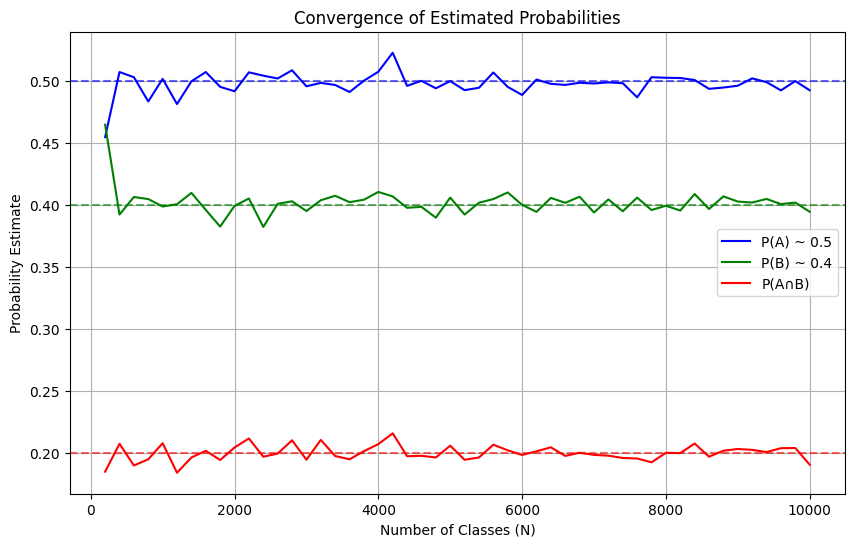

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Simulation for one trial
def simulate_independent(N=1000):
    # Student A -> P(A)=0.5
    A = [1 if random.random() > 0.5 else 0 for _ in range(N)]
    # Student B -> P(B)=0.4  (so random > 0.6)
    B = [1 if random.random() > 0.6 else 0 for _ in range(N)]

    A = np.array(A); B = np.array(B)
    pA = A.mean()
    pB = B.mean()
    pAB = (A & B).mean()
    return pA, pB, pAB

# Multiple trials to estimate probabilities
def run_experiments(trials=200, N=1000):
    pA_list, pB_list, pAB_list = [], [], []
    for _ in range(trials):
        pA, pB, pAB = simulate_independent(N)
        pA_list.append(pA)
        pB_list.append(pB)
        pAB_list.append(pAB)

    pA_mean = np.mean(pA_list)
    pB_mean = np.mean(pB_list)
    pAB_mean = np.mean(pAB_list)

    print("=== Multiple Trial Averages ===")
    print("Estimated P(A):", round(pA_mean,4))
    print("Estimated P(B):", round(pB_mean,4))
    print("Estimated P(A∩B):", round(pAB_mean,4))
    print("Expected P(A)P(B):", round(pA_mean*pB_mean,4))
    print("Difference =", round(pAB_mean - pA_mean*pB_mean,6))
    return pA_list, pB_list, pAB_list

# Run two separate experiments of 1000 classes
def compare_two_runs(N=1000):
    def simulate_once(N):
        A = [1 if random.random() > 0.5 else 0 for _ in range(N)]
        B = [1 if random.random() > 0.6 else 0 for _ in range(N)]
        return np.mean(A), np.mean(B)

    avg_A1, avg_B1 = simulate_once(N)
    avg_A2, avg_B2 = simulate_once(N)

    print("\n=== Two Independent Runs (each N=1000) ===")
    print("First Run:  Avg A =", round(avg_A1,4), "Avg B =", round(avg_B1,4))
    print("Second Run: Avg A =", round(avg_A2,4), "Avg B =", round(avg_B2,4))

    print("Fraction Difference: A =", round(abs(avg_A1 - avg_A2),4),
          "B =", round(abs(avg_B1 - avg_B2),4))

# Convergence Graph
def convergence_graph(maxN=10000, step=200):
    Ns, pA_vals, pB_vals, pAB_vals = [], [], [], []
    for N in range(step, maxN+1, step):
        pA, pB, pAB = simulate_independent(N)
        Ns.append(N)
        pA_vals.append(pA)
        pB_vals.append(pB)
        pAB_vals.append(pAB)

    plt.figure(figsize=(10,6))
    plt.plot(Ns, pA_vals, label="P(A) ~ 0.5", color="blue")
    plt.plot(Ns, pB_vals, label="P(B) ~ 0.4", color="green")
    plt.plot(Ns, pAB_vals, label="P(A∩B)", color="red")
    plt.axhline(0.5, color="blue", linestyle="--", alpha=0.6)
    plt.axhline(0.4, color="green", linestyle="--", alpha=0.6)
    plt.axhline(0.5*0.4, color="red", linestyle="--", alpha=0.6)
    plt.xlabel("Number of Classes (N)")
    plt.ylabel("Probability Estimate")
    plt.title("Convergence of Estimated Probabilities")
    plt.legend()
    plt.grid(True)
    plt.show()

# ---------------- RUN ALL ----------------
pA_list, pB_list, pAB_list = run_experiments(trials=200, N=1000)
compare_two_runs(N=1000)
convergence_graph(maxN=10000, step=200)
